In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans

In [2]:
# read file 
df = pd.read_csv("bank-full.csv")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
df.describe(include='O')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,subscribed
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


### Domain Experience is very important

<AxesSubplot:xlabel='age', ylabel='Count'>

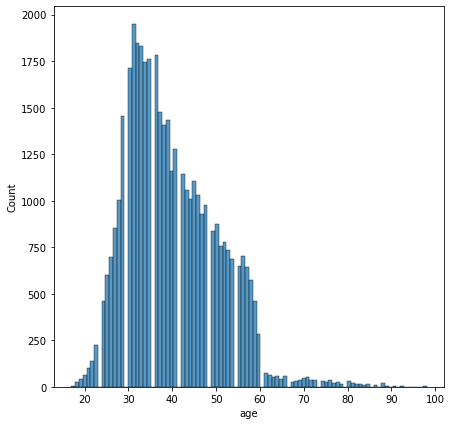

In [9]:
plt.figure(figsize=[7,7])
sns.histplot(data=df,x='age')

<AxesSubplot:xlabel='age', ylabel='Count'>

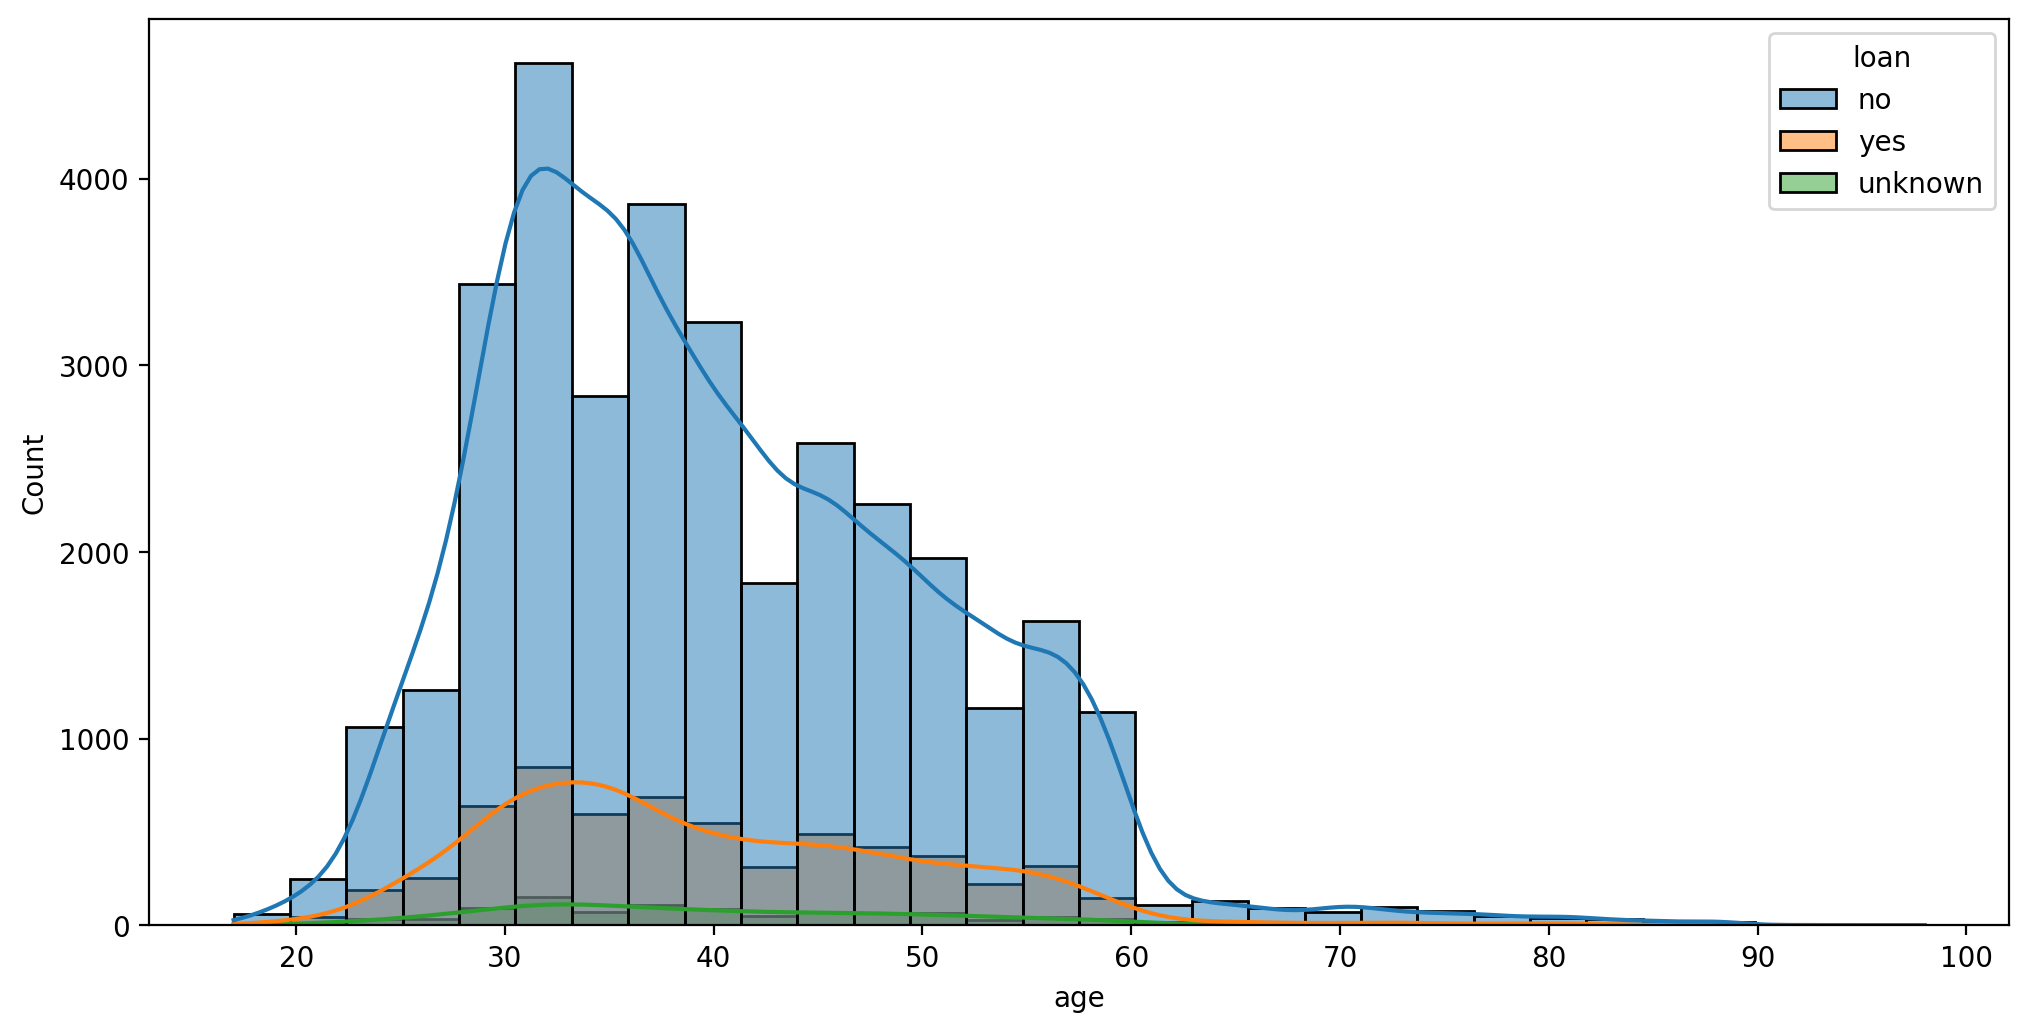

In [12]:
plt.figure(figsize=[12,6],dpi=200)
sns.histplot(data=df,x='age',bins=30,kde=True,hue='loan')

<AxesSubplot:xlabel='pdays', ylabel='Count'>

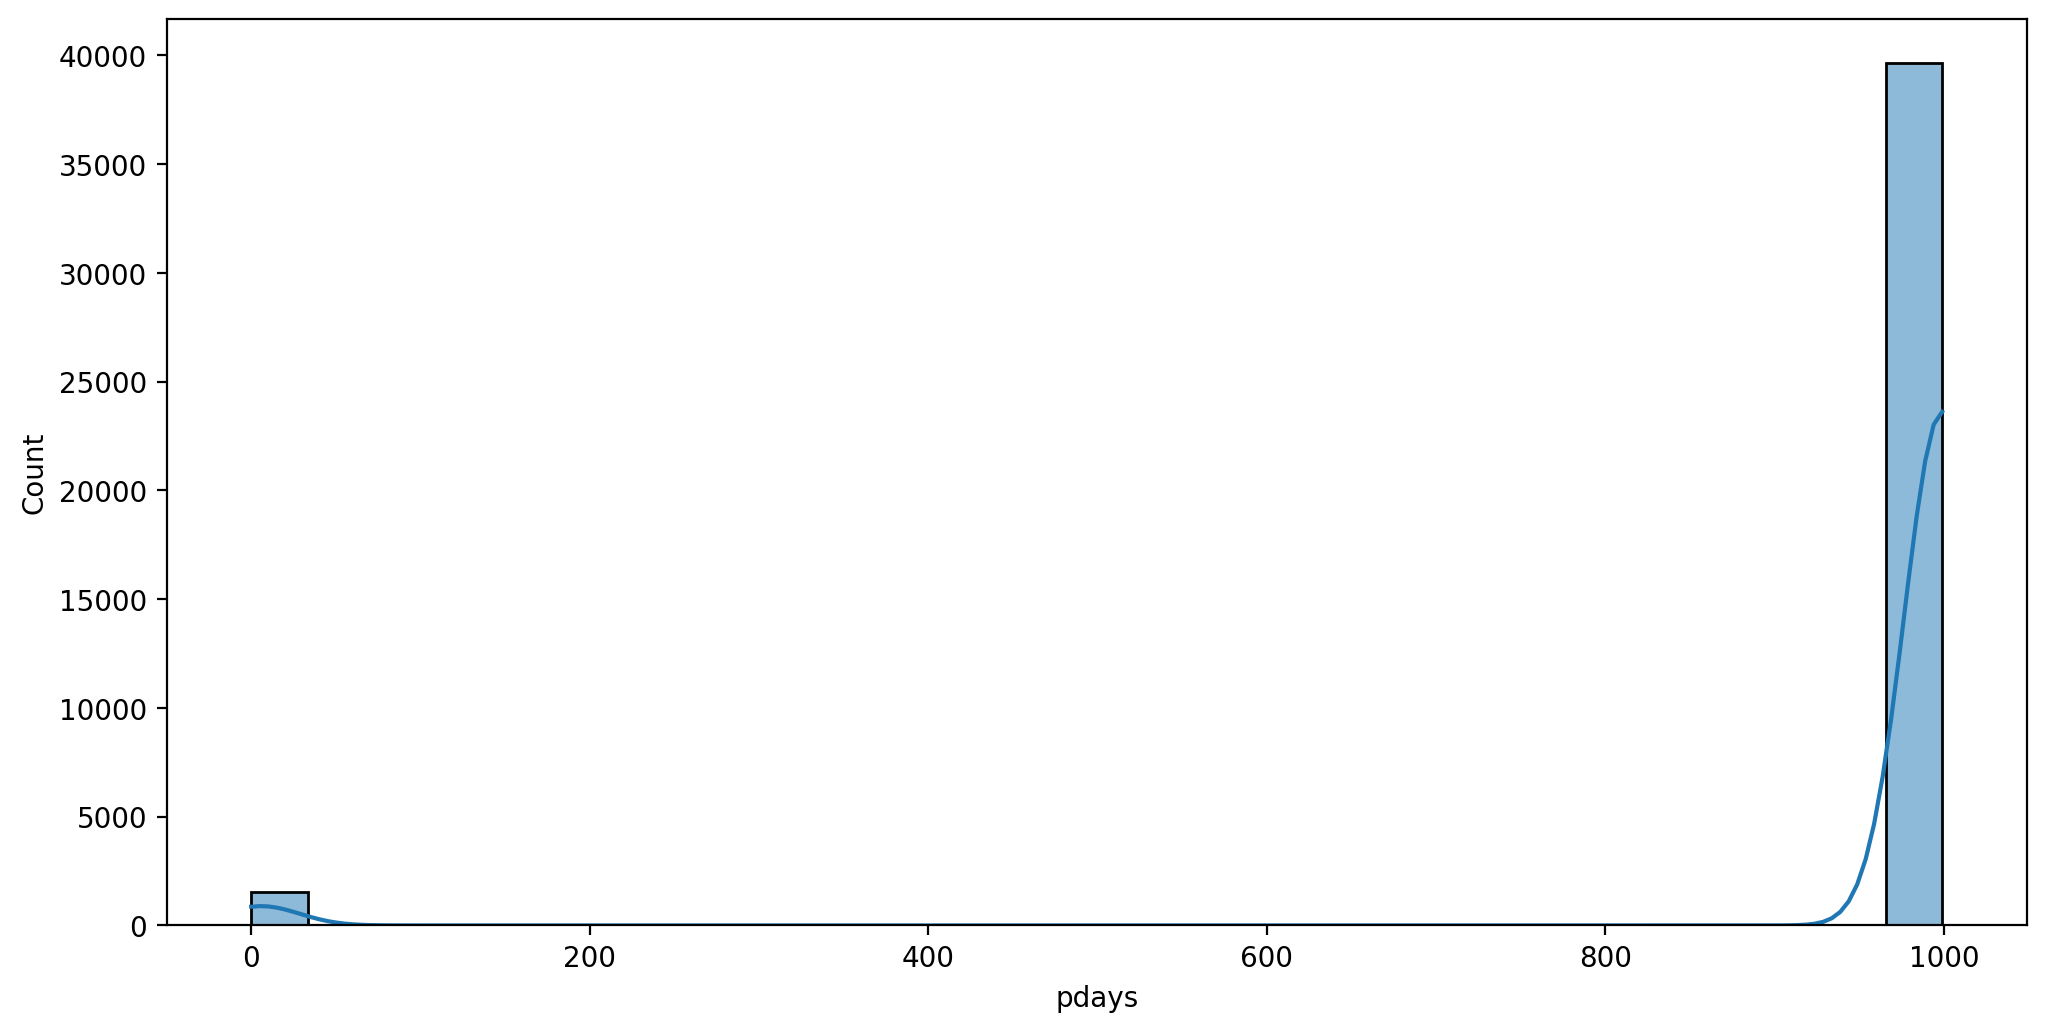

In [14]:
plt.figure(figsize=[12,6],dpi=200)
sns.histplot(data=df,x='pdays',bins=30,kde=True)

<AxesSubplot:xlabel='pdays', ylabel='Count'>

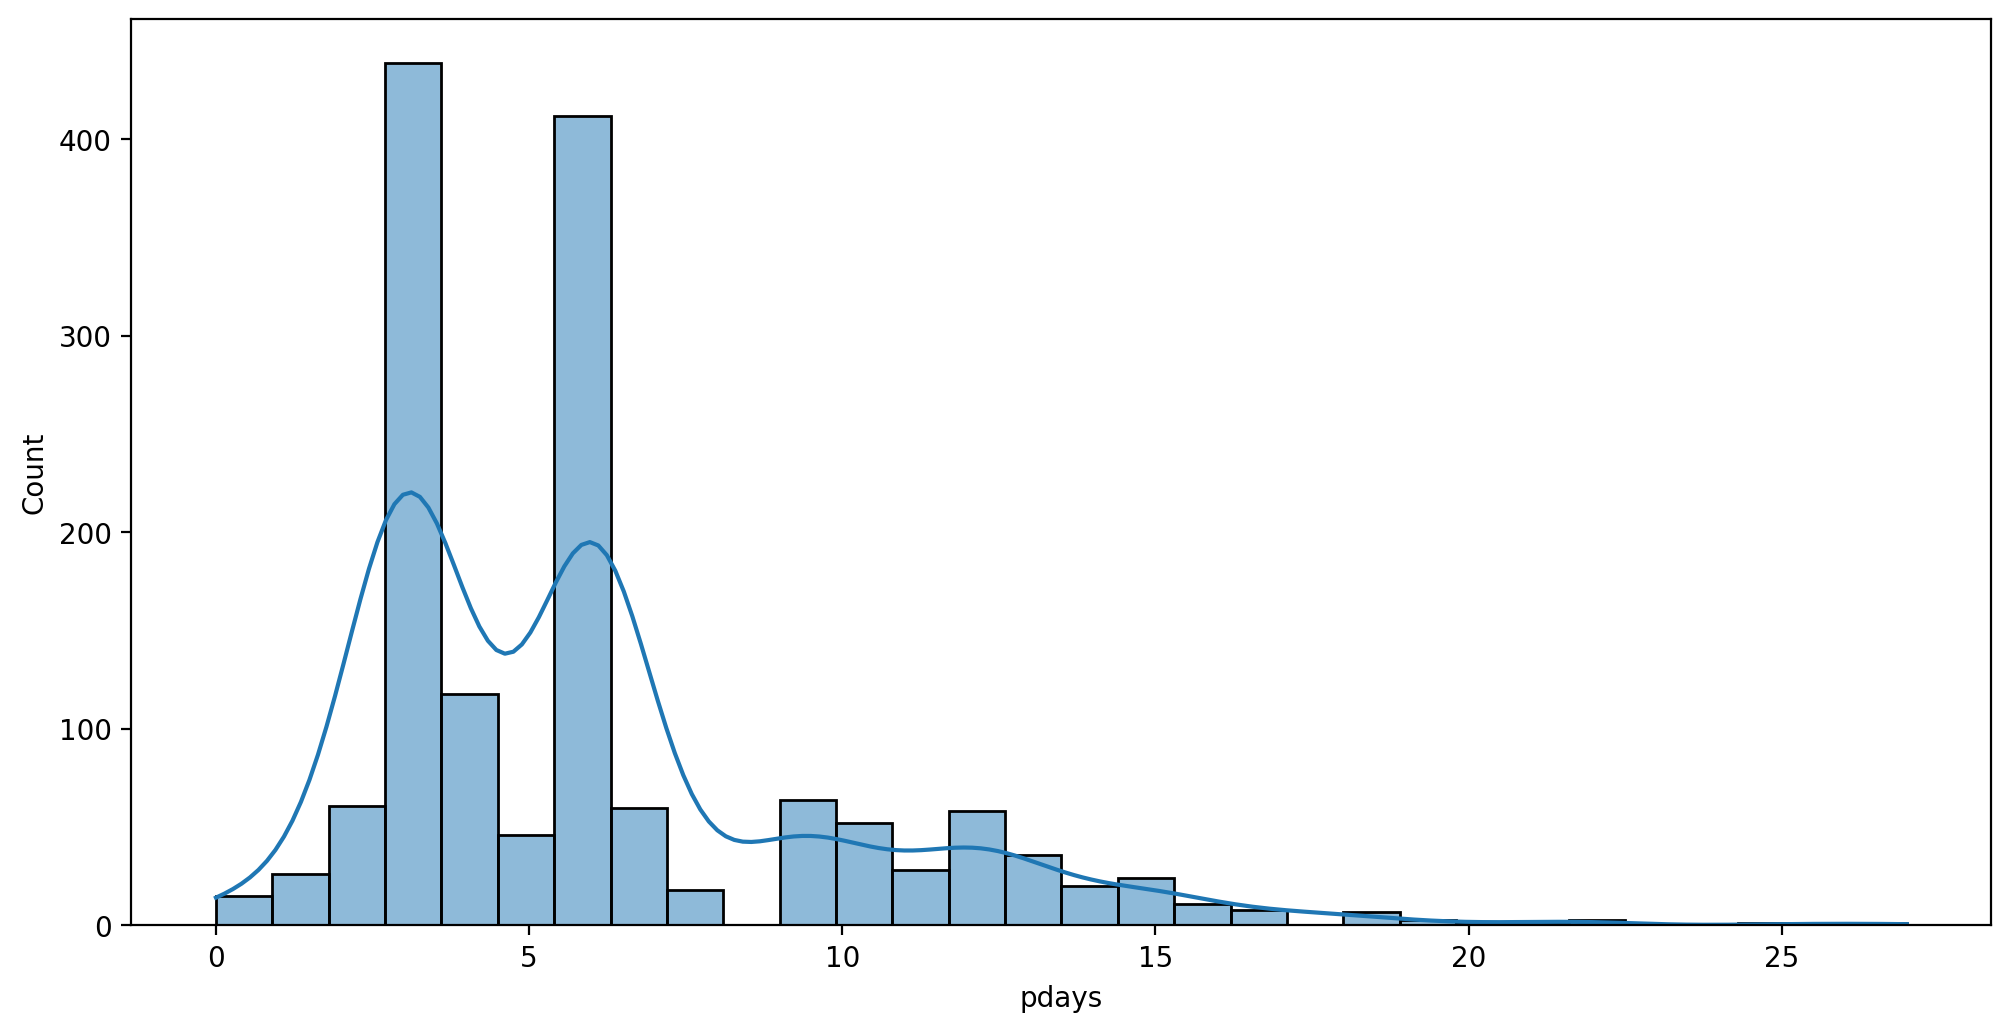

In [17]:
plt.figure(figsize=[12,6],dpi=200)
sns.histplot(data=df[df['pdays']!=999],x='pdays',bins=30,kde=True)

In [18]:
df['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

<AxesSubplot:xlabel='duration', ylabel='Count'>

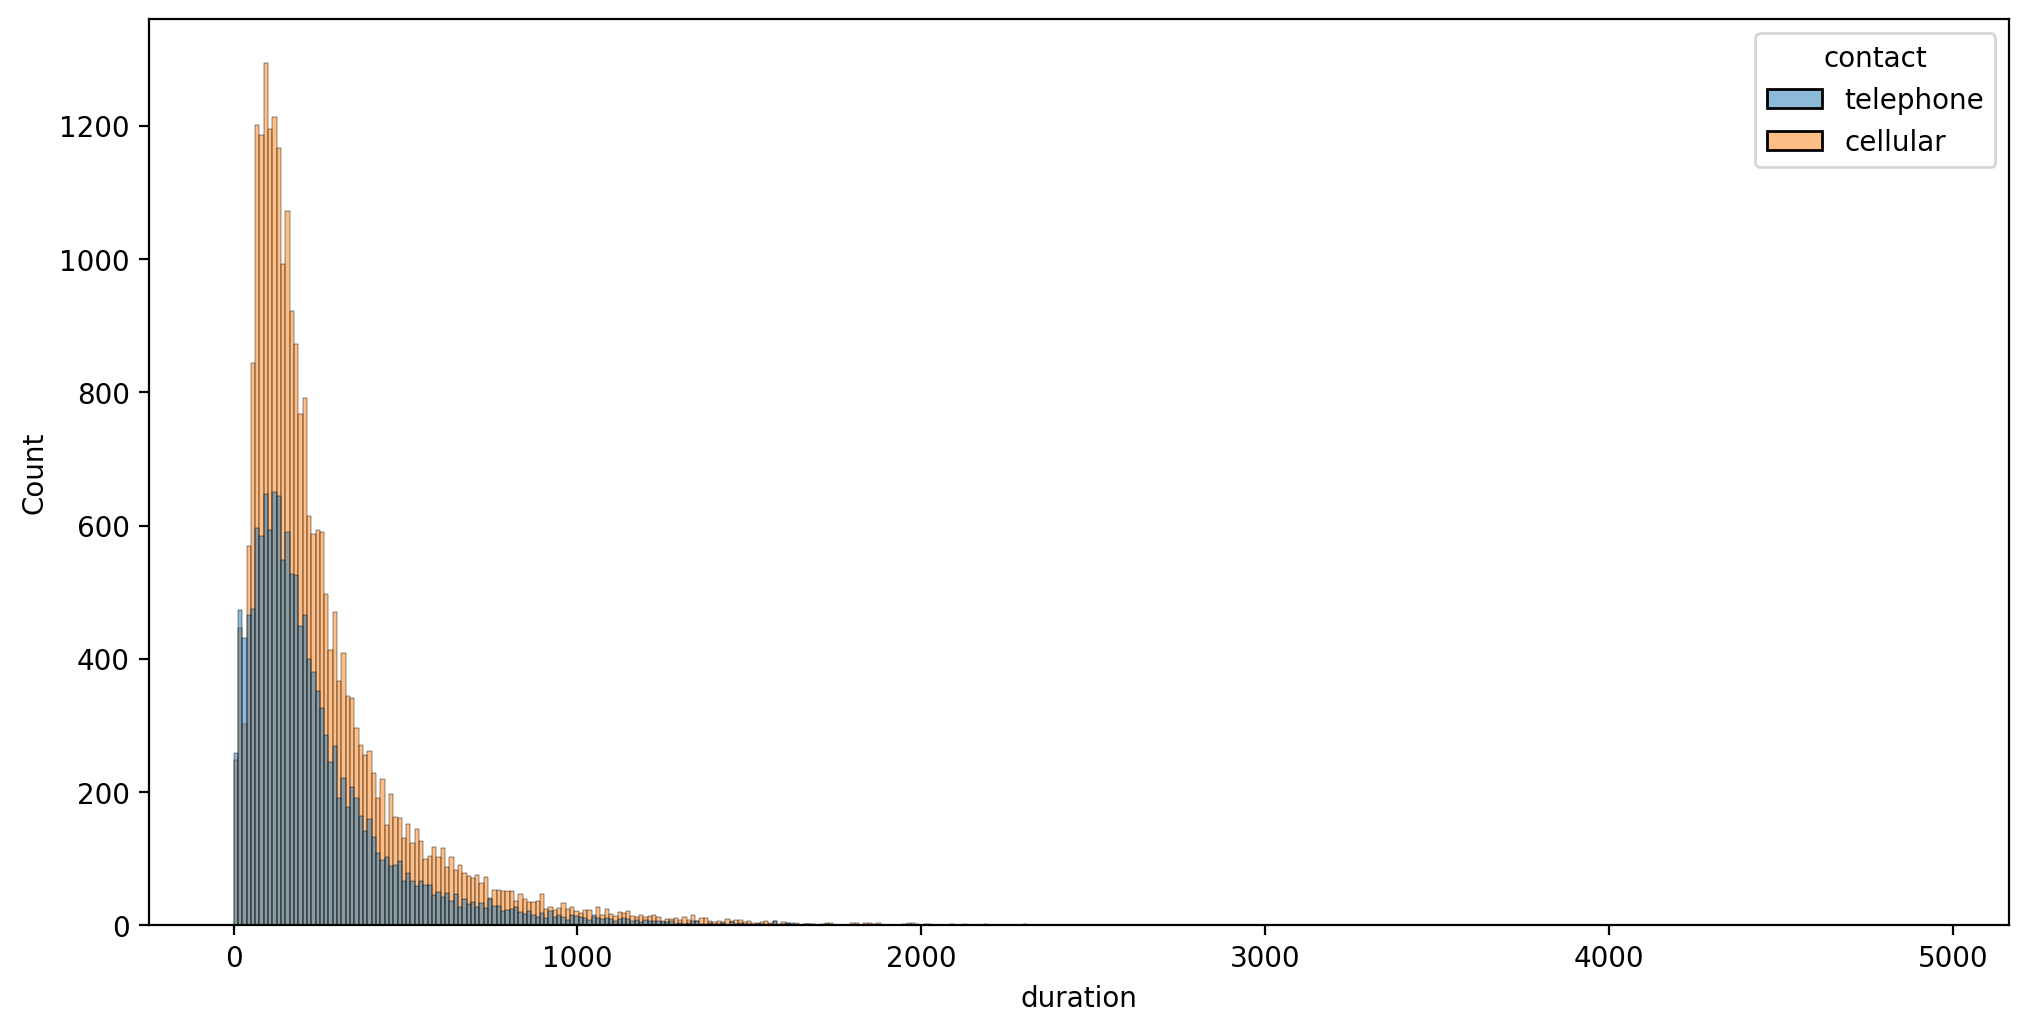

In [20]:
plt.figure(figsize=[12,6],dpi=200)
sns.histplot(data=df,x='duration',hue='contact')

(0.0, 1000.0)

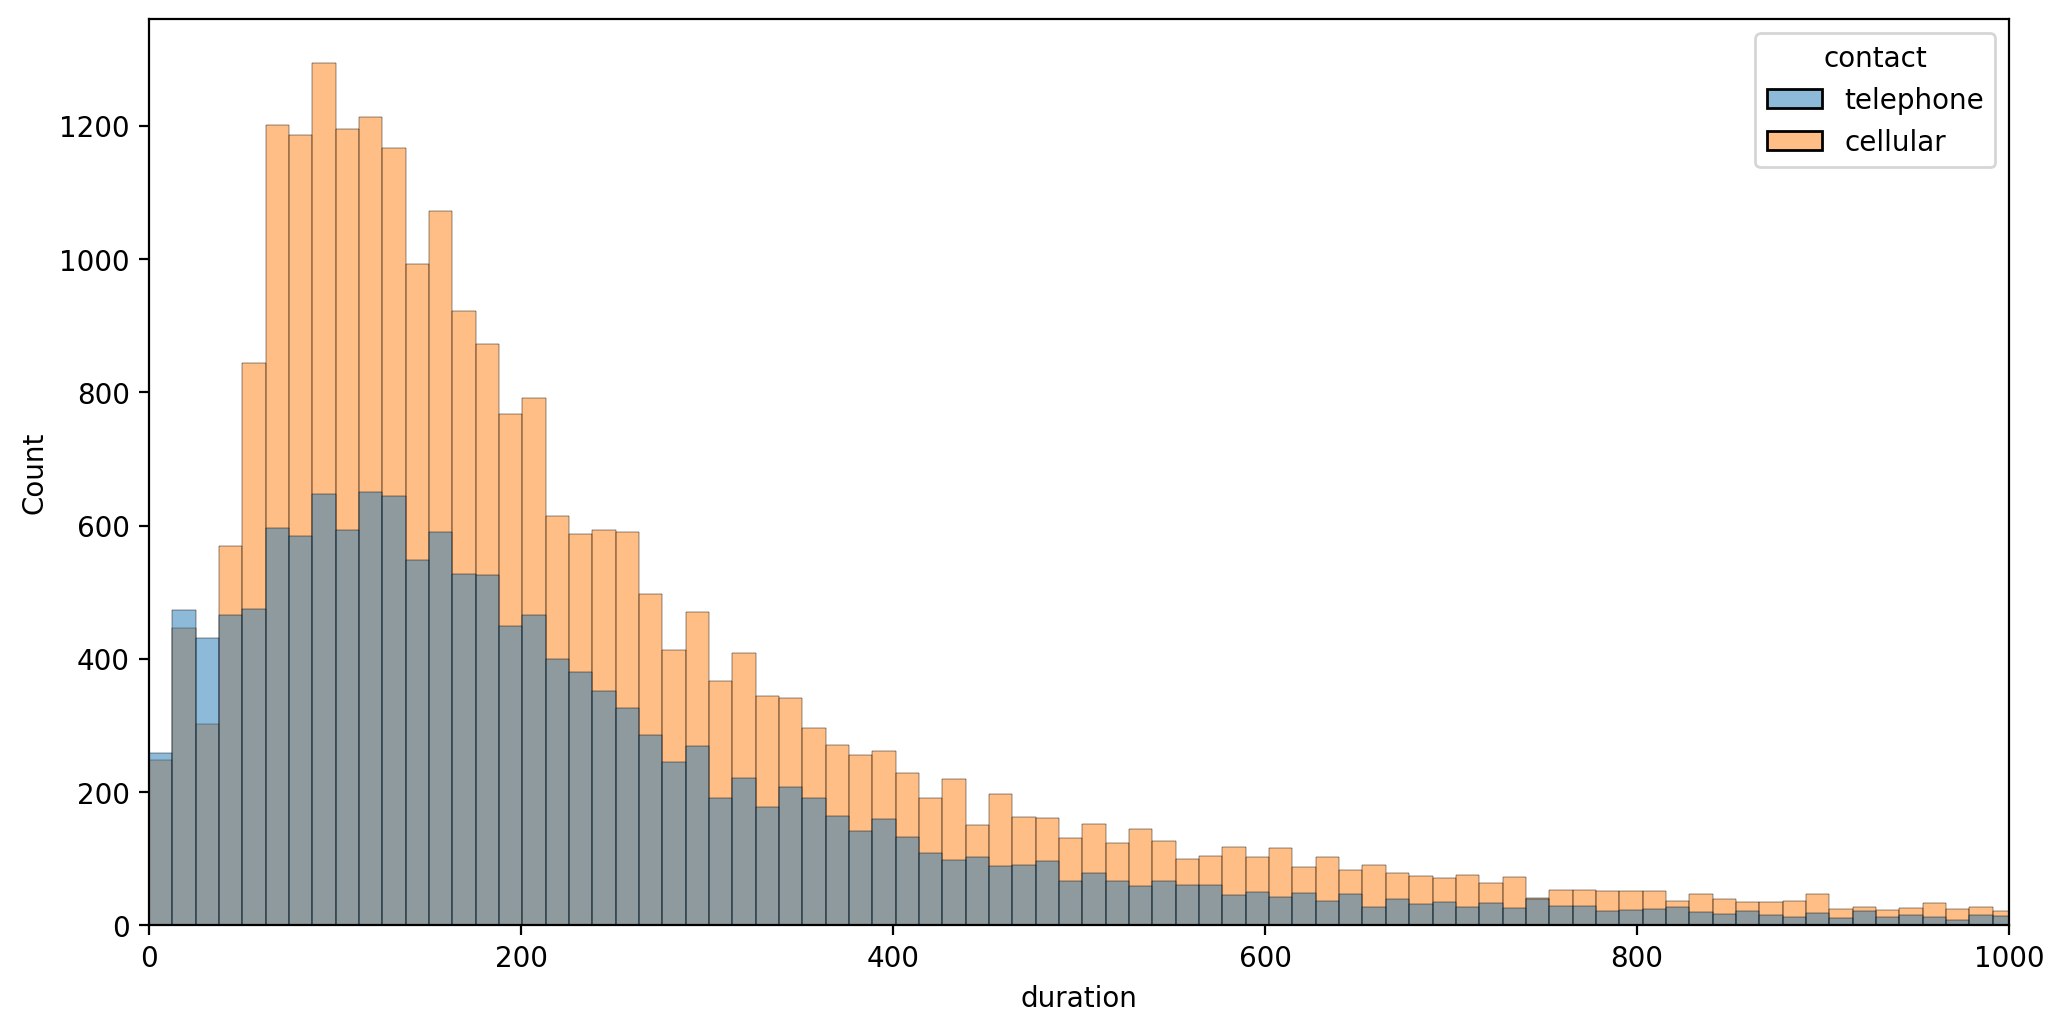

In [21]:
plt.figure(figsize=[12,6],dpi=200)
sns.histplot(data=df,x='duration',hue='contact')
plt.xlim(0,1000)

<AxesSubplot:xlabel='contact', ylabel='count'>

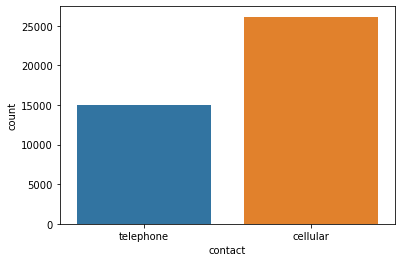

In [23]:
sns.countplot(data=df,x='contact')

In [28]:
df['job'].value_counts().index

Index(['admin.', 'blue-collar', 'technician', 'services', 'management',
       'retired', 'entrepreneur', 'self-employed', 'housemaid', 'unemployed',
       'student', 'unknown'],
      dtype='object')

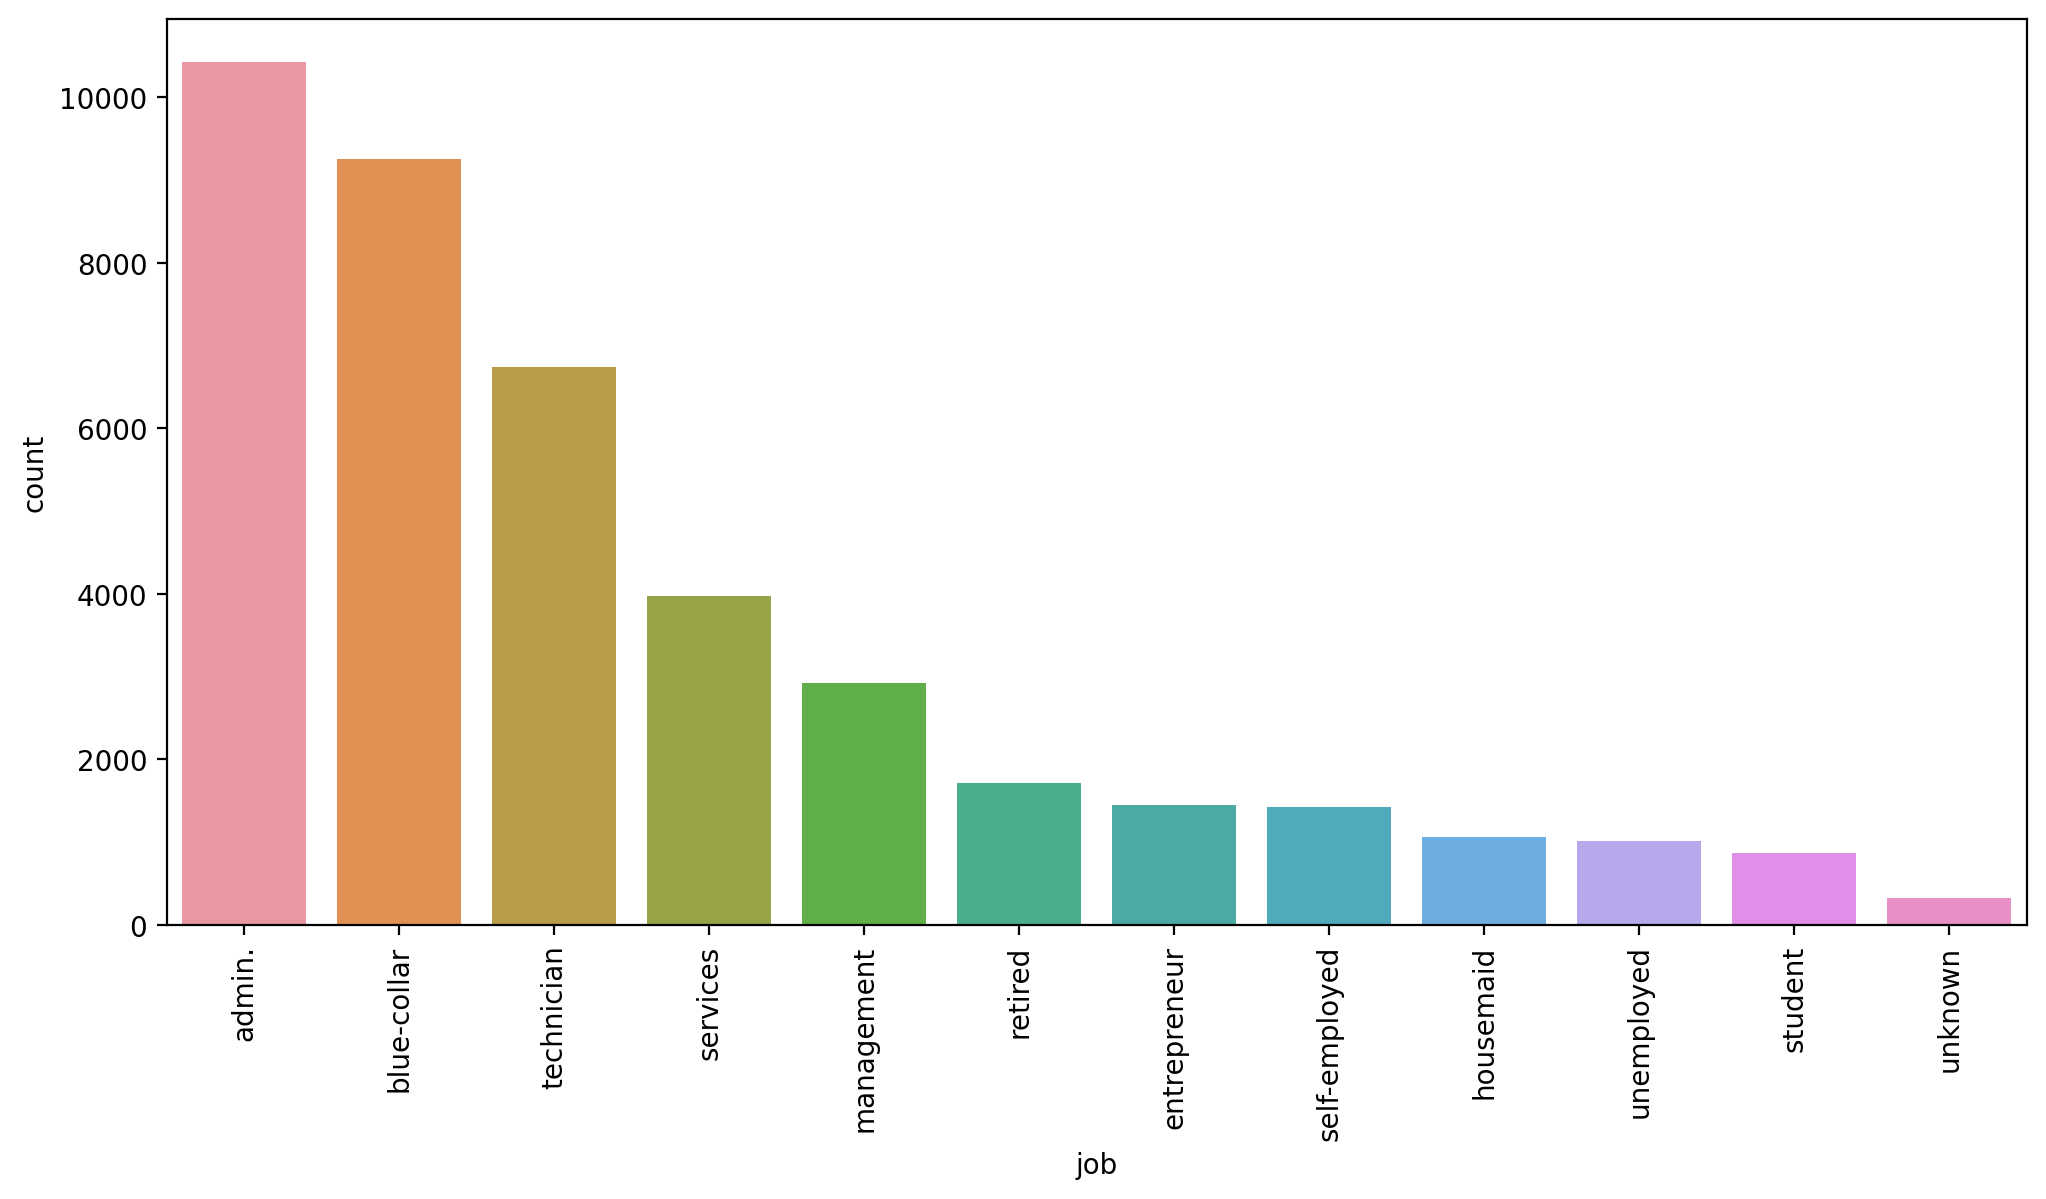

In [29]:
plt.figure(figsize=[12,6],dpi=200)
sns.countplot(data=df,x='job',order=df['job'].value_counts().index)
plt.xticks(rotation=90);

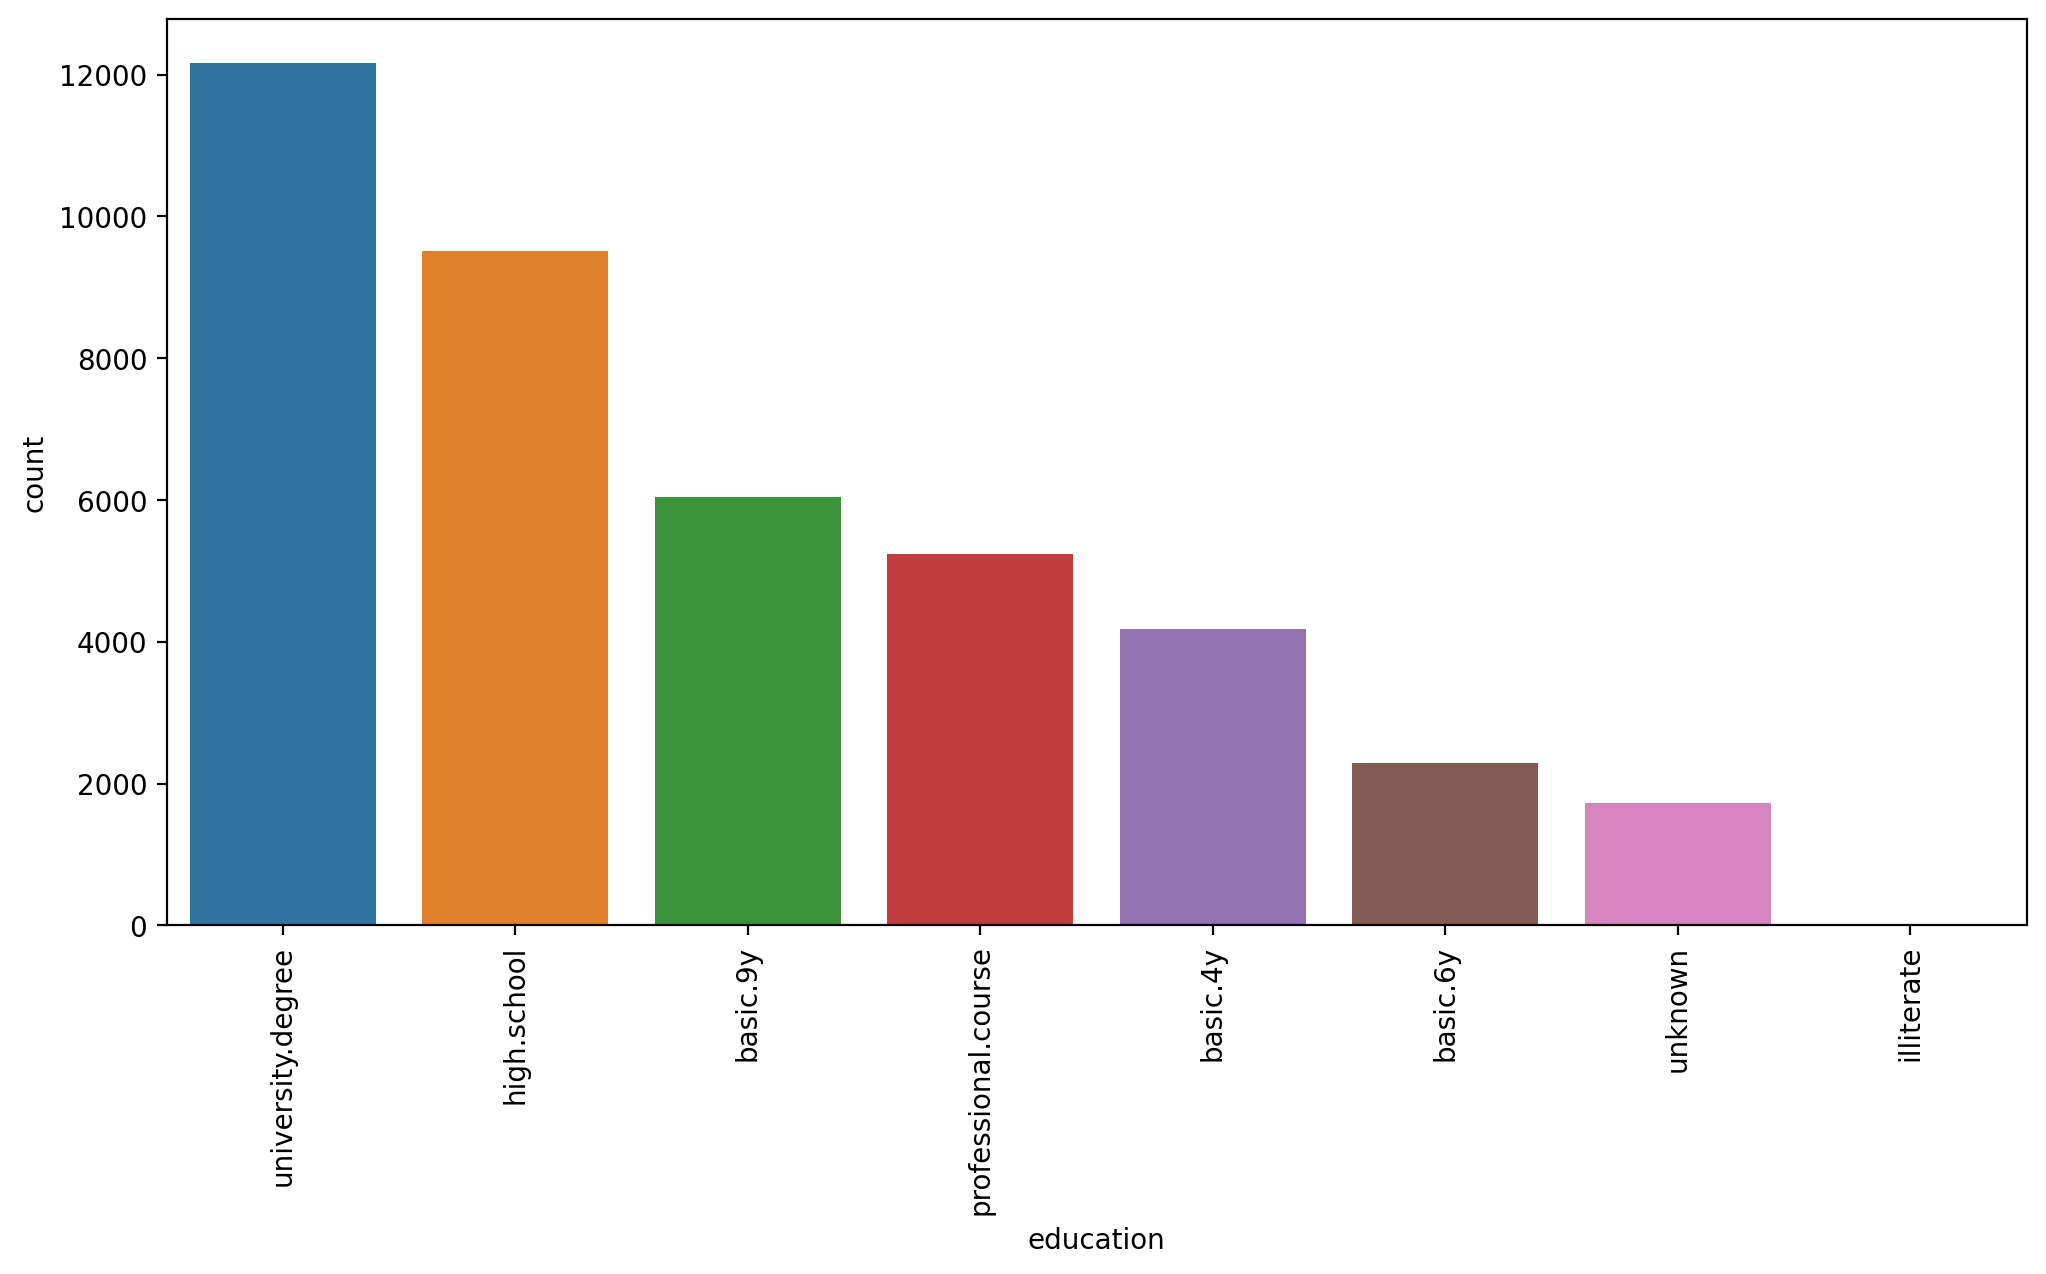

In [31]:
plt.figure(figsize=[12,6],dpi=200)
sns.countplot(data=df,x='education',order=df['education'].value_counts().index)
plt.xticks(rotation=90);

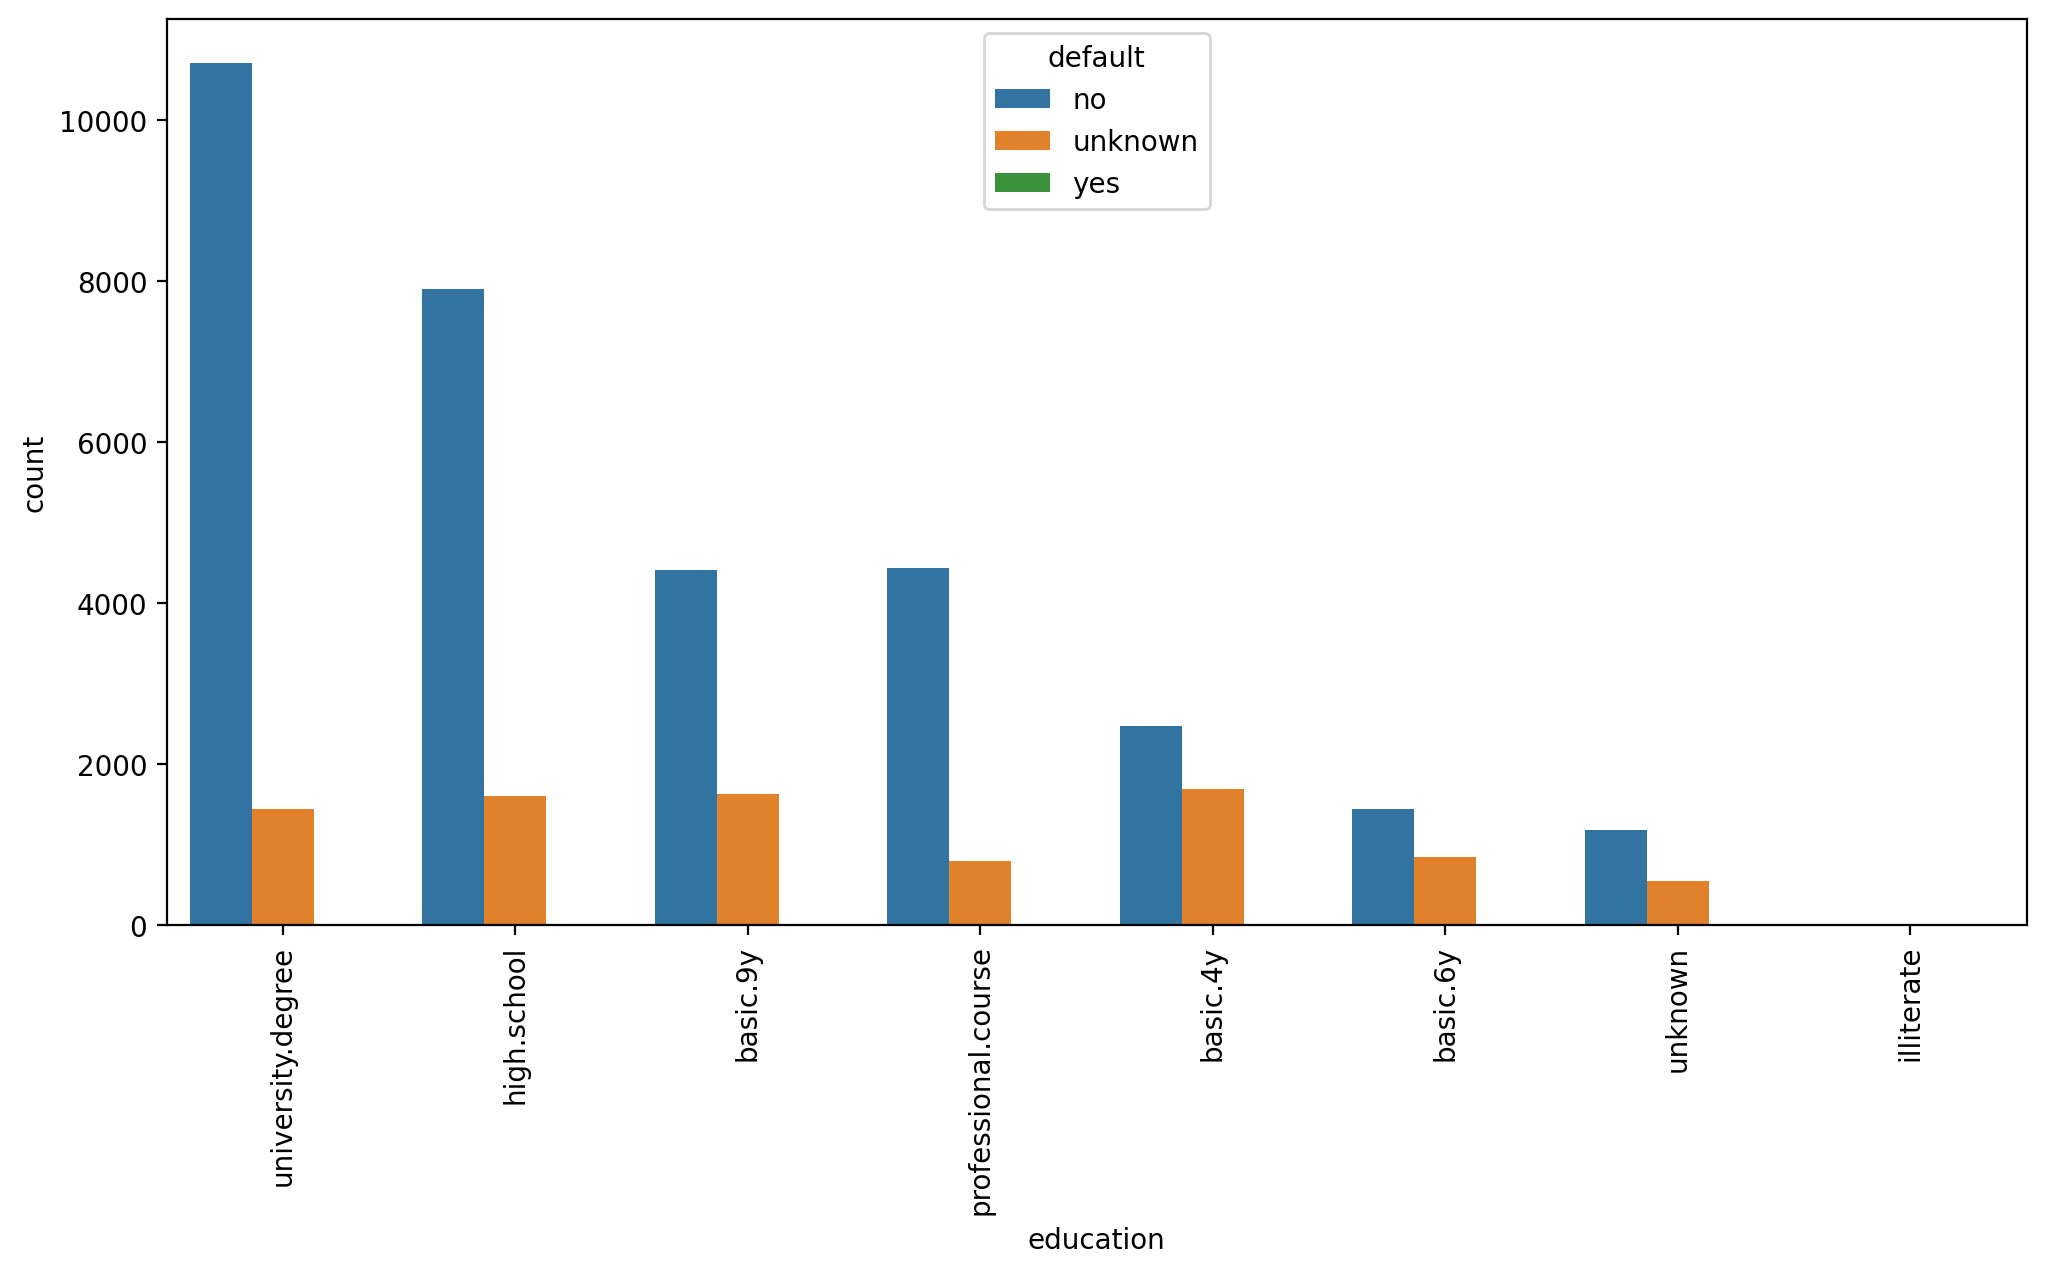

In [33]:
plt.figure(figsize=[12,6],dpi=200)
sns.countplot(data=df,x='education',order=df['education'].value_counts().index,hue='default')
plt.xticks(rotation=90);

<AxesSubplot:xlabel='default', ylabel='count'>

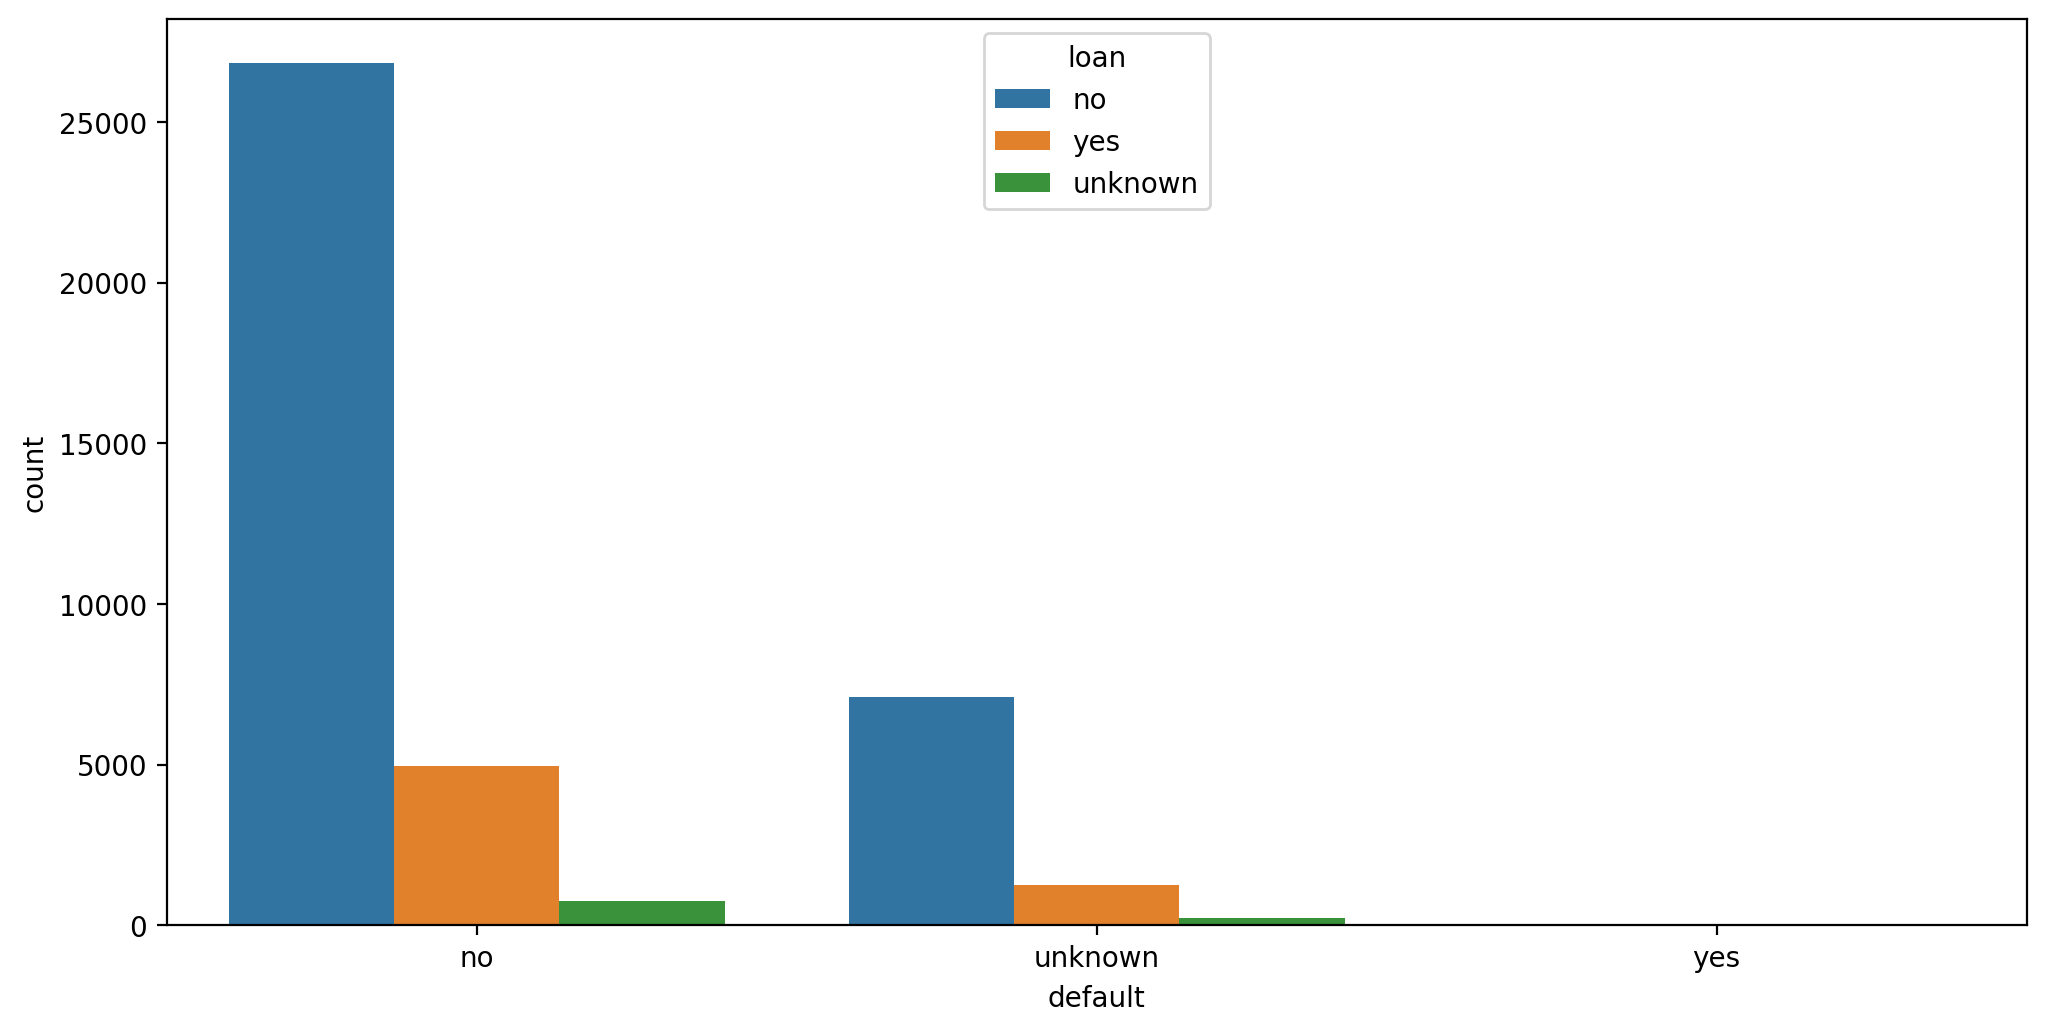

In [35]:
plt.figure(figsize=[12,6],dpi=200)
sns.countplot(data=df,x='default',hue='loan')

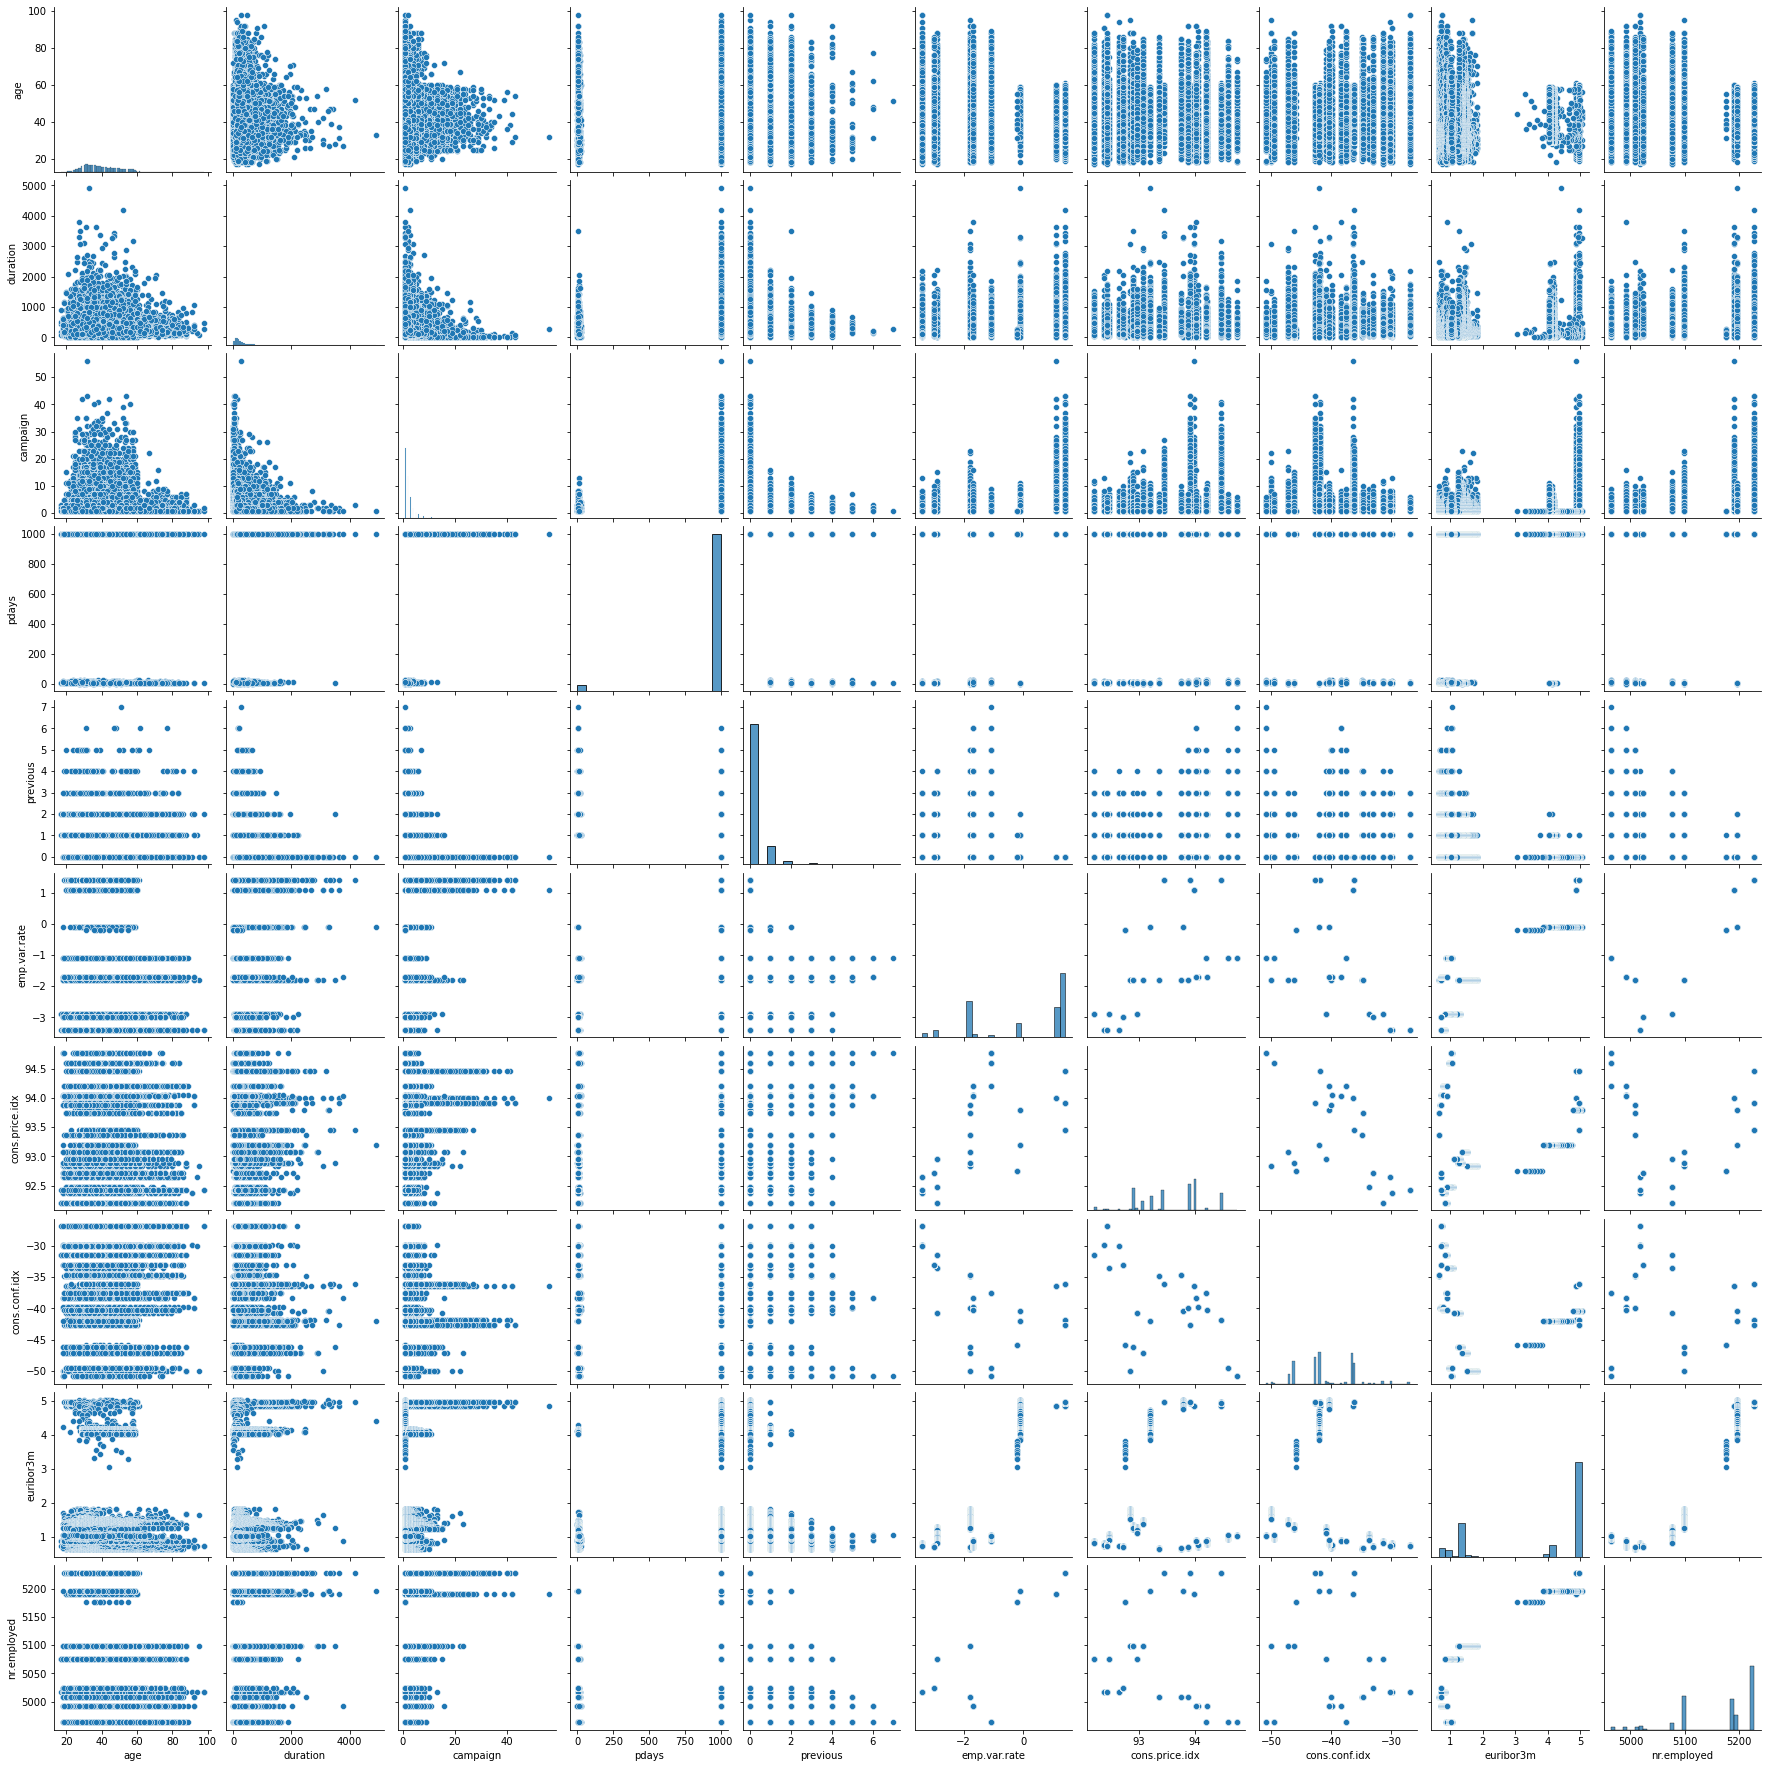

In [36]:
sns.pairplot(df)

In [37]:
x = pd.get_dummies(df)

In [39]:
scaler = StandardScaler()

In [40]:
scaled_x = scaler.fit_transform(x)

In [43]:
# help(KMeans)

In [52]:
model = KMeans(n_clusters=2,random_state=101)

In [53]:
# fit_transform
cluster_labels = model.fit_predict(scaled_x)

In [54]:
cluster_labels

array([1, 1, 1, ..., 0, 0, 0])

In [55]:
x['cluster'] = cluster_labels

In [56]:
x

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes,cluster
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,1
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,1
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,1
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,1
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,0,0,1,0,0,1,0
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,0,0,1,0,1,0,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,0,0,1,0,1,0,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,0,0,1,0,0,1,0


In [57]:
x.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes,cluster
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,...,0.019027,-0.021356,0.019137,-0.023671,-0.002537,-0.016376,0.035626,-0.030399,0.030399,0.019767
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,...,-0.023068,0.014666,0.004140,0.014537,-0.013311,-0.011665,0.044876,-0.405274,0.405274,-0.039581
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,...,0.014405,0.005141,-0.025125,-0.021088,-0.068890,0.087645,-0.050893,0.066357,-0.066357,0.129103
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,...,0.001031,-0.008186,-0.007300,0.001021,0.006354,0.491353,-0.950700,0.324914,-0.324914,0.267714
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,...,-0.002012,0.001512,0.000090,-0.003929,0.682608,-0.878776,0.524045,-0.230181,0.230181,-0.478493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
poutcome_nonexistent,-0.016376,-0.011665,0.087645,0.491353,-0.878776,0.472501,0.304264,0.099724,0.488406,0.493051,...,0.002226,-0.000585,0.001574,0.006545,-0.853119,1.000000,-0.466928,0.193507,-0.193507,0.544406
poutcome_success,0.035626,0.044876,-0.050893,-0.950700,0.524045,-0.256886,-0.077416,0.084824,-0.281022,-0.350613,...,-0.002276,0.008827,0.007258,-0.000390,-0.063006,-0.466928,1.000000,-0.316269,0.316269,-0.254406
subscribed_no,-0.030399,-0.405274,0.066357,0.324914,-0.230181,0.298334,0.136211,-0.054878,0.307771,0.354678,...,0.021265,-0.013888,-0.008046,-0.006302,-0.031799,0.193507,-0.316269,1.000000,-1.000000,0.294472
subscribed_yes,0.030399,0.405274,-0.066357,-0.324914,0.230181,-0.298334,-0.136211,0.054878,-0.307771,-0.354678,...,-0.021265,0.013888,0.008046,0.006302,0.031799,-0.193507,0.316269,-1.000000,1.000000,-0.294472


<AxesSubplot:>

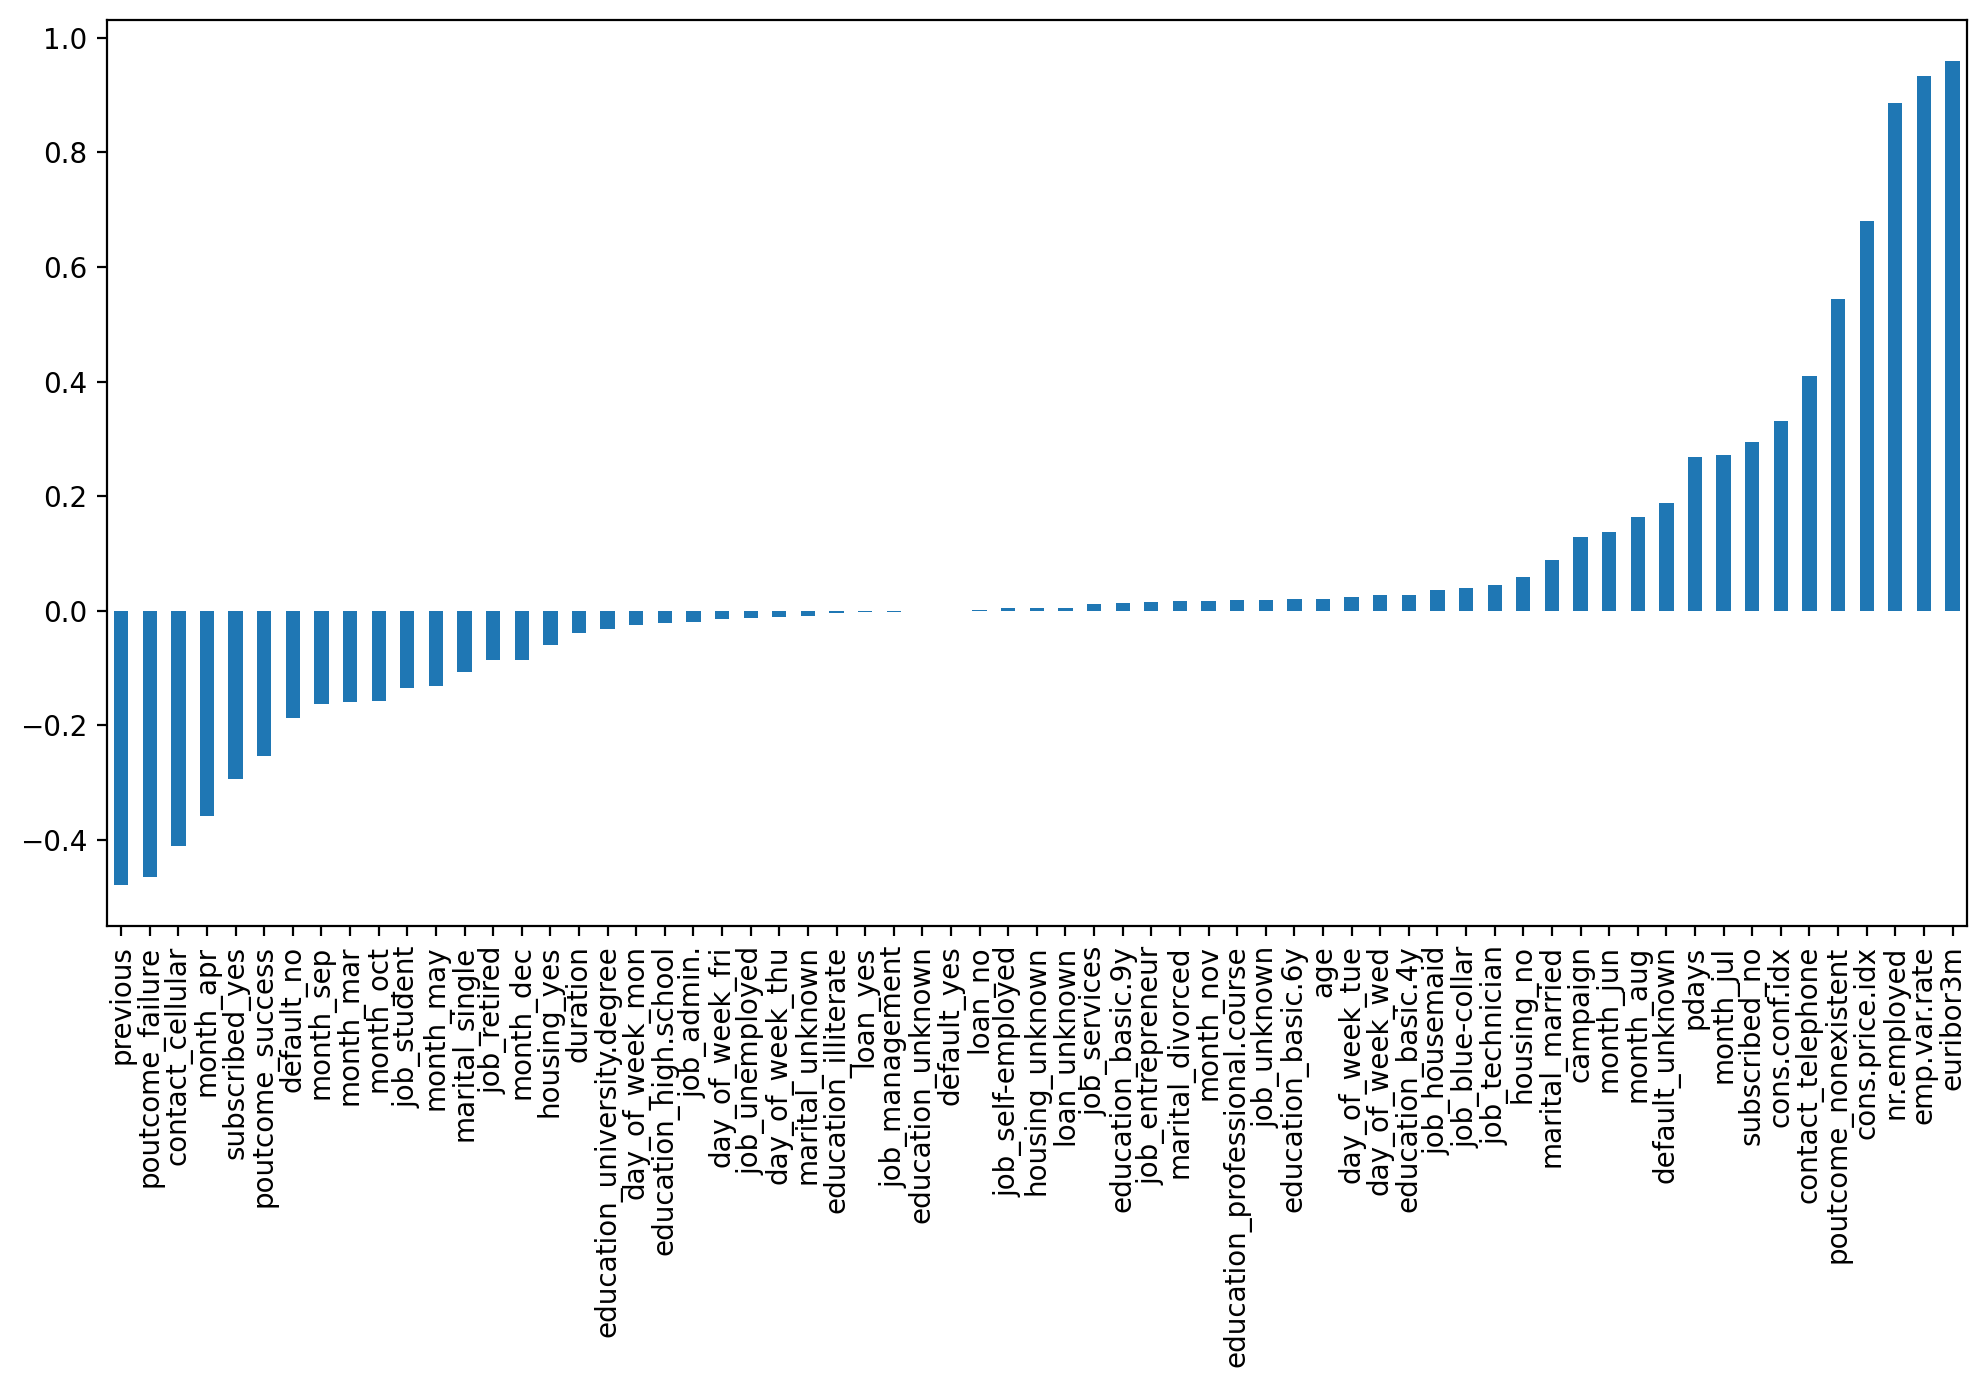

In [62]:
plt.figure(figsize=[12,6],dpi=200)
x.corr()['cluster'].iloc[:-1].sort_values().plot(kind='bar')

# Elobow method

In [64]:
ssd = []
for k in range(2,10):
    model = KMeans(n_clusters=k)
    model.fit(scaled_x)
    
    ssd.append(model.inertia_) # SSD Points --> cluster center
     

In [65]:
ssd

[2469792.3616627757,
 2370786.4528778666,
 2271502.808197097,
 2203314.1925017447,
 2156288.790621933,
 2081016.873704875,
 2080214.171160168,
 1998849.947174284]

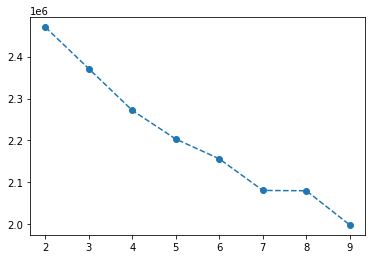

In [73]:
plt.plot(range(2,10),ssd,'o--')

In [75]:
pd.Series(ssd)

0    2.469792e+06
1    2.370786e+06
2    2.271503e+06
3    2.203314e+06
4    2.156289e+06
5    2.081017e+06
6    2.080214e+06
7    1.998850e+06
dtype: float64

In [74]:
pd.Series(ssd).diff()

0             NaN
1   -99005.908785
2   -99283.644681
3   -68188.615695
4   -47025.401880
5   -75271.916917
6     -802.702545
7   -81364.223986
dtype: float64

## Accelerated K-Means and Mini-batch K-Means
* considerably accelerates the algorithm by avoiding many unnecessary distance calculations: this is achieved by exploiting the triangle inequality.
* This is the algorithm used by default by the KMeans class (but you can force it to use the original algorithm by setting the algorithm **hyperparameter to "full"**. 
* or use another algorithm **MiniBatchKMeans class.**
* **Although the Mini-batch K-Means algorithm is much faster than the regular KMeans algorithm, its inertia is generally slightly worse, especially as the number of clusters increases.**

In [81]:
minibatchmodel = MiniBatchKMeans(n_clusters=2,batch_size=4096)

In [82]:
# fit_transform
minibatch_labels = minibatchmodel.fit_predict(scaled_x)

In [83]:
minibatch_labels

array([1, 1, 1, ..., 0, 0, 0])

In [89]:
mini_ssd = []
for k in range(2,10):
    model = MiniBatchKMeans(n_clusters=k,batch_size=4096)
    model.fit(scaled_x)
    
    mini_ssd.append(model.inertia_) # SSD Points --> cluster center
     

In [90]:
mini_ssd

[2470670.780927744,
 2389035.7548646037,
 2350156.5387318577,
 2249723.47367157,
 2204612.776924255,
 2205984.7925077756,
 2100128.4313555667,
 2029788.009421392]

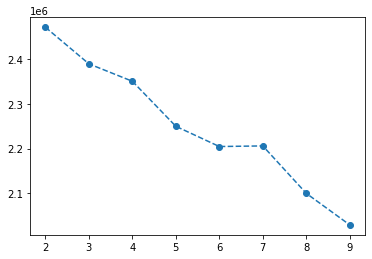

In [91]:
plt.plot(range(2,10),mini_ssd,'o--')

In [94]:
pd.Series(mini_ssd)

0    2.470671e+06
1    2.389036e+06
2    2.350157e+06
3    2.249723e+06
4    2.204613e+06
5    2.205985e+06
6    2.100128e+06
7    2.029788e+06
dtype: float64

In [95]:
pd.Series(mini_ssd).diff()

0              NaN
1    -81635.026063
2    -38879.216133
3   -100433.065060
4    -45110.696747
5      1372.015584
6   -105856.361152
7    -70340.421934
dtype: float64